In [1]:
# Firstly we'll import all the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
import warnings

In [3]:
# Importing the dataset
train_data=r'F:\Study\Machine Learning\Time Series Analysis\Train_SU63ISt.csv'
test_data=r'F:\Study\Machine Learning\Time Series Analysis\Test_0qrQsBZ.csv'
train_df=pd.read_csv(train_data)
test_df=pd.read_csv(test_data)
# Also with these we'll prepare the copy of these two data sets on which further operations we'll perform
train_copy=train_df.copy()
test_copy=test_df.copy()

### Now we'll gain understanding of the structure of our dataset

In [4]:
print(train_copy.columns)
print(test_copy.columns)

Index(['ID', 'Datetime', 'Count'], dtype='object')
Index(['ID', 'Datetime'], dtype='object')


In [5]:
train_copy.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [6]:
test_copy.dtypes

ID           int64
Datetime    object
dtype: object

In [7]:
print(train_copy.shape)
print(test_copy.shape)

(18288, 3)
(5112, 2)


In [8]:
train_copy['ID'].values

array([    0,     1,     2, ..., 18285, 18286, 18287], dtype=int64)

In [9]:
train_copy['Datetime'].value_counts

<bound method IndexOpsMixin.value_counts of 0        25-08-2012 00:00
1        25-08-2012 01:00
2        25-08-2012 02:00
3        25-08-2012 03:00
4        25-08-2012 04:00
               ...       
18283    25-09-2014 19:00
18284    25-09-2014 20:00
18285    25-09-2014 21:00
18286    25-09-2014 22:00
18287    25-09-2014 23:00
Name: Datetime, Length: 18288, dtype: object>

In [10]:
train_copy['Count'].value_counts

<bound method IndexOpsMixin.value_counts of 0          8
1          2
2          6
3          2
4          2
        ... 
18283    868
18284    732
18285    702
18286    580
18287    534
Name: Count, Length: 18288, dtype: int64>

In [11]:
"""The train set consisting of data entries for 2 years
The Datetime column contain time values at an interval of 1 hour
Count column shows no of passengers using the service in that 1 hour interval"""

'The train set consisting of data entries for 2 years\nThe Datetime column contain time values at an interval of 1 hour\nCount column shows no of passengers using the service in that 1 hour interval'

In [12]:
# Almost all the information source to built time series model is contained in datatime column
#But as can be seen from the dtypes, its data type is object 
# So firstly we need to convert it to data type of datetime

In [13]:
train_df['Datetime']=pd.to_datetime(train_df['Datetime'],dayfirst=True)
test_df['Datetime']=pd.to_datetime(test_df['Datetime'],dayfirst=True)
train_copy['Datetime']=pd.to_datetime(train_copy['Datetime'],dayfirst=True)
test_copy['Datetime']=pd.to_datetime(test_copy['Datetime'],dayfirst=True)

In [14]:
# For train_copy data set
train_copy['Year']=train_copy['Datetime'].dt.year
train_copy['Month']=train_copy['Datetime'].dt.month
train_copy['Day']=train_copy['Datetime'].dt.day
train_copy['Hour']=train_copy['Datetime'].dt.hour
train_copy['Day of week']=train_copy['Datetime'].dt.dayofweek
#For test_copy data set
test_copy['Year']=test_copy['Datetime'].dt.year
test_copy['Month']=test_copy['Datetime'].dt.month
test_copy['Day']=test_copy['Datetime'].dt.day
test_copy['Hour']=test_copy['Datetime'].dt.hour
test_copy['Day of week']=test_copy['Datetime'].dt.dayofweek

In [15]:
train_copy.head()

,ID,Datetime,Count,Year,Month,Day,Hour,Day of week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5


In [16]:
test_copy.head()

,ID,Datetime,Year,Month,Day,Hour,Day of week
0,18288,2014-09-26 00:00:00,2014,9,26,0,4
1,18289,2014-09-26 01:00:00,2014,9,26,1,4
2,18290,2014-09-26 02:00:00,2014,9,26,2,4
3,18291,2014-09-26 03:00:00,2014,9,26,3,4
4,18292,2014-09-26 04:00:00,2014,9,26,4,4


In [17]:
# It's a common notion that people travel mostly in weekend days, so we need to built a categorical variable to classify normal days and weekend days

In [18]:
train_copy['weekend']=pd.cut(train_copy['Day of week'],bins=[0,4,6],labels=[0,1])
test_copy['weekend']=pd.cut(test_copy['Day of week'],bins=[0,4,6],labels=[0,1])


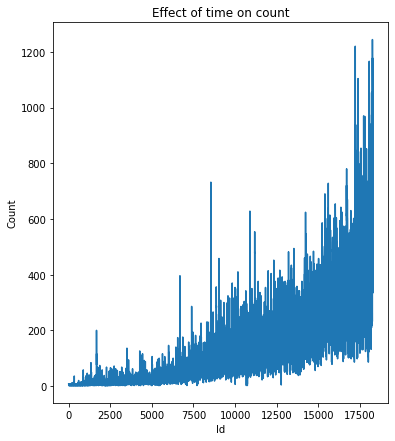

In [19]:
#Now we have our dataset ready with us.Let's plot it
plt.figure(figsize=(6,7))
plt.plot(train_copy['Count'])
plt.xlabel('Id')
plt.ylabel('Count')
plt.title('Effect of time on count')
plt.show()

In [20]:
# Above graph clearly exhibit the presence of trend, seasonality
# Also the sudden peaks illustrates that there is further many effects like of weekend, vacation months, timings etc.

### Now we'll perform exploratory analysis to get some insights

In [21]:
new_df=train_copy.groupby(by='Year',axis=0).sum()
new_df

,ID,Count,Month,Day,Hour,Day of week
Year,,,,,,
2012,4791060,34932,32112,50832,35604,9336
2013,65485380,685968,57168,137712,100740,26232
2014,96939888,1820366,31800,99384,73968,19272


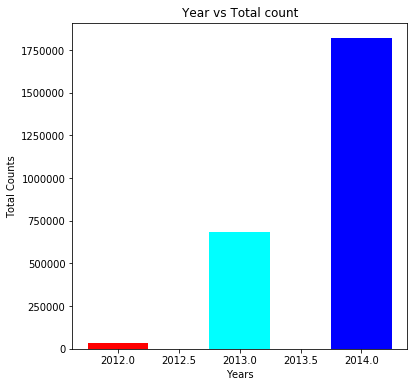

In [22]:
plt.figure(figsize=(6,6))
plt.bar(new_df.index,new_df['Count'],width=.5,color=['red','cyan','blue'])
plt.xlabel('Years')
plt.ylabel('Total Counts')
plt.title('Year vs Total count')
plt.show()

In [23]:
# Above graph clearly shows increase of passenger count with year

In [24]:
#Now we'll see the trend of each year for all month
df_1=train_copy[train_copy['Year']==2012].groupby(by='Month',axis=0).sum()
df_2=train_copy[train_copy['Year']==2013].groupby(by='Month',axis=0).sum()
df_3=train_copy[train_copy['Year']==2014].groupby(by='Month',axis=0).sum()

In [25]:
df_1.head()

,ID,Count,Year,Day,Hour,Day of week
Month,,,,,,
8,14028,496,338016,4704,1932,504
9,379800,3200,1448640,11160,8280,2280
10,937068,8174,1496928,11904,8556,2088
11,1433880,11396,1448640,11160,8280,2184
12,2026284,11666,1496928,11904,8556,2280


Text(0, 0.5, 'Counts')

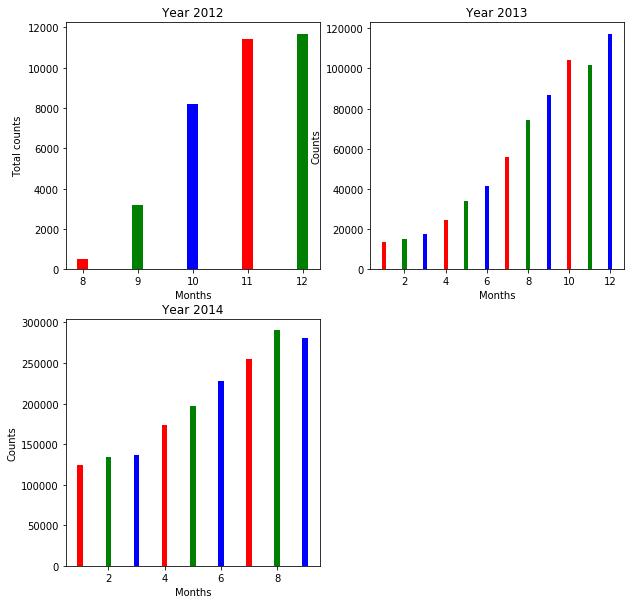

In [26]:
plt.figure(figsize=(10,10))
ax1=plt.subplot(2,2,1)
ax2=plt.subplot(2,2,2)
ax3=plt.subplot(2,2,3)
ax1.bar(df_1.index,df_1['Count'],width=.2,color='rgb')
ax1.set_title('Year 2012')
ax1.set_xlabel('Months')
ax1.set_ylabel('Total counts')
ax2.bar(df_2.index,df_2['Count'],width=.2,color='rgb')
ax2.set_title('Year 2013')
ax2.set_xlabel('Months')
ax2.set_ylabel('Counts')
ax3.bar(df_3.index,df_3['Count'],width=.2,color='rgb')
ax3.set_title('Year 2014')
ax3.set_xlabel('Months')
ax3.set_ylabel('Counts')

In [27]:
df_4=train_copy[train_copy['Year']==2014].groupby(by='Month',axis=0).count()
df_4

,ID,Datetime,Count,Year,Day,Hour,Day of week,weekend
Month,,,,,,,,
1,744,744,744,744,744,744,744,648
2,672,672,672,672,672,672,672,576
3,744,744,744,744,744,744,744,624
4,720,720,720,720,720,720,720,624
5,744,744,744,744,744,744,744,648
6,720,720,720,720,720,720,720,600
7,744,744,744,744,744,744,744,648
8,744,744,744,744,744,744,744,648
9,600,600,600,600,600,600,600,504


In [28]:
#Above graph clearly shows more counts in months of Oct, Nov, Dec
# The reason for decline in population in case of 2014 is that sufficient entries are not available for end months

The inference that can be drawn from above graphs is:
1. More traffic remains in the months of Oct, Nov, Dec
2. Least in the months of Jan, Feb, March

In [29]:
# Let's check the effect of weekdays on traffic

In [30]:
df_1=train_copy[train_copy['Year']==2013].groupby(by='Day of week',axis=0).count()
df_2=train_copy[train_copy['Year']==2013].groupby(by='Day of week',axis=0).sum()

In [31]:
df_1

,ID,Datetime,Count,Year,Month,Day,Hour,weekend
Day of week,,,,,,,,
0,1248,1248,1248,1248,1248,1248,1248,0
1,1272,1272,1272,1272,1272,1272,1272,1272
2,1248,1248,1248,1248,1248,1248,1248,1248
3,1248,1248,1248,1248,1248,1248,1248,1248
4,1248,1248,1248,1248,1248,1248,1248,1248
5,1248,1248,1248,1248,1248,1248,1248,1248
6,1248,1248,1248,1248,1248,1248,1248,1248


In [32]:
# At backend, above df_1 was run for different values of year
# For year 2013, the no. of observations were same for all the weekdays except 1, therefore we can analyze effect of weekdays using 2013 year

Text(0, 0.5, 'Counts')

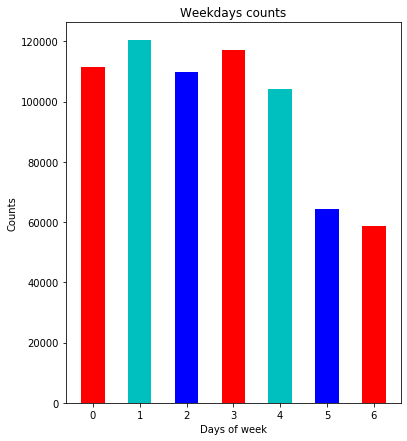

In [33]:
plt.figure(figsize=(6,7))
plt.bar(df_2.index,df_2.Count,width=.5,color='rcb')
plt.title('Weekdays counts')
plt.xlabel('Days of week')
plt.ylabel('Counts')

The inference we can draw from this is:
Passengers traffic is least on weekends since these are normally holidays

In [34]:
#The last effect we need to analyze is the effect of times
df_1=train_copy.groupby(by='Hour',axis=0).sum()
df_1

,ID,Count,Year,Month,Day,Day of week
Hour,,,,,,
0,6958584,112544,1534045,5045,11997,2285
1,6959346,89816,1534045,5045,11997,2285
2,6960108,76012,1534045,5045,11997,2285
3,6960870,62806,1534045,5045,11997,2285
4,6961632,52864,1534045,5045,11997,2285
5,6962394,47322,1534045,5045,11997,2285
6,6963156,50884,1534045,5045,11997,2285
7,6963918,59012,1534045,5045,11997,2285
8,6964680,67956,1534045,5045,11997,2285


Text(0, 0.5, 'counts')

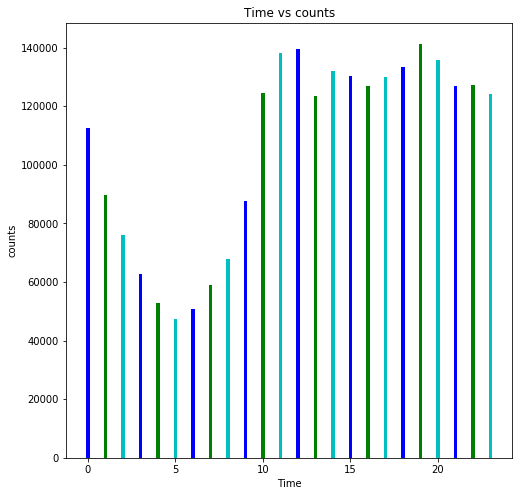

In [35]:
plt.figure(figsize=(8,8))
plt.bar(df_1.index,df_1['Count'],width=.2,color='bgc')
plt.title('Time vs counts')
plt.xlabel('Time')
plt.ylabel('counts')

In [36]:
#0 represents the 12:00 A.M. and all other times can be calcualed accordingly

The inference that can be drawn from this:
The least traffic is observed between 12:00 a.m. to 7 a.m. After that traffic increases continuously upto 10:00 a.m. After that it shows peak at 12:00 pm and then becomes uniform

### Modeling the dataset 

In [37]:
# After some modifications our data set will be ready to get modelled

In [38]:
train_copy.head()

,ID,Datetime,Count,Year,Month,Day,Hour,Day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [39]:
test_copy.head()

,ID,Datetime,Year,Month,Day,Hour,Day of week,weekend
0,18288,2014-09-26 00:00:00,2014,9,26,0,4,0
1,18289,2014-09-26 01:00:00,2014,9,26,1,4,0
2,18290,2014-09-26 02:00:00,2014,9,26,2,4,0
3,18291,2014-09-26 03:00:00,2014,9,26,3,4,0
4,18292,2014-09-26 04:00:00,2014,9,26,4,4,0


In [40]:
# We have data for each hour which will create unusual population to analyze.
# Let's firstly create daily data


In [41]:
# Id column is not desirable so we can drop it

In [42]:
train_copy.drop('ID',axis=1,inplace=True)
test_copy.drop('ID',axis=1,inplace=True)

In [43]:
train_copy=train_copy.resample('D',on='Datetime').mean()
test_copy=test_copy.resample('D',on='Datetime').mean()

In [44]:
train_copy

,Count,Year,Month,Day,Hour,Day of week
Datetime,,,,,,
2012-08-25,3.166667,2012.0,8.0,25.0,11.5,5.0
2012-08-26,3.666667,2012.0,8.0,26.0,11.5,6.0
2012-08-27,2.583333,2012.0,8.0,27.0,11.5,0.0
2012-08-28,2.416667,2012.0,8.0,28.0,11.5,1.0
2012-08-29,2.500000,2012.0,8.0,29.0,11.5,2.0
...,...,...,...,...,...,...
2014-09-21,379.250000,2014.0,9.0,21.0,11.5,6.0
2014-09-22,588.166667,2014.0,9.0,22.0,11.5,0.0
2014-09-23,554.333333,2014.0,9.0,23.0,11.5,1.0


In [45]:
test_copy

,Year,Month,Day,Hour,Day of week
Datetime,,,,,
2014-09-26,2014.0,9.0,26.0,11.5,4.0
2014-09-27,2014.0,9.0,27.0,11.5,5.0
2014-09-28,2014.0,9.0,28.0,11.5,6.0
2014-09-29,2014.0,9.0,29.0,11.5,0.0
2014-09-30,2014.0,9.0,30.0,11.5,1.0
...,...,...,...,...,...
2015-04-22,2015.0,4.0,22.0,11.5,2.0
2015-04-23,2015.0,4.0,23.0,11.5,3.0
2015-04-24,2015.0,4.0,24.0,11.5,4.0


In [46]:
# The initial dataset contains hourly data which contains lot of noise and is also difficult to analyze
# Therefore, we have converted it to daily data

C:\Users\HP PC\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Mean Count')

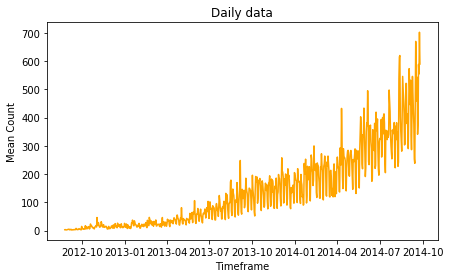

In [47]:
#Let's see the plot of daily data
plt.figure(figsize=(7,4))
plt.plot(train_copy.Count,color='orange')
plt.title('Daily data')
plt.xlabel('Timeframe')
plt.ylabel('Mean Count')

In [48]:
#To build our model we have to divide the training data into train and validation part
train=train_copy.loc['2012-08-25':'2014-06-25']
valid=train_copy.loc['2014-06-26':'2014-09-25']

Text(0, 0.5, 'Mean Count')

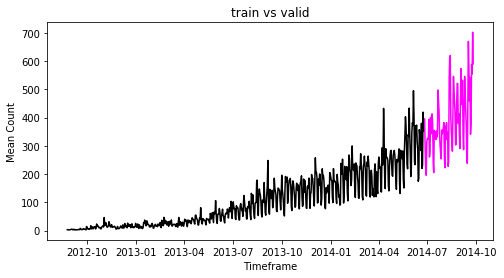

In [49]:
plt.figure(figsize=(8,4))
plt.plot(train['Count'],color='black')
plt.plot(valid['Count'],color='magenta')
plt.title('train vs valid')
plt.xlabel('Timeframe')
plt.ylabel('Mean Count')

### Since our data has seasonality so the relevant models are:
     1. Holt's Winter model
     2. ARIMA model
     3. SARIMAX model

Let's analyze each one by one

### Holt's Winter model

In [50]:
from statsmodels.tsa.api import ExponentialSmoothing
y_hat=valid.copy()
fit1=ExponentialSmoothing(train['Count'].values,trend='mul',seasonal='mul',seasonal_periods=7).fit()
y_hat['predict']=fit1.forecast(len(valid))

In [51]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(y_hat['predict'],valid['Count']))
rmse

69.48843497656917

**The best rmse value that can be obtained from Holt's Winter model is 69.488**

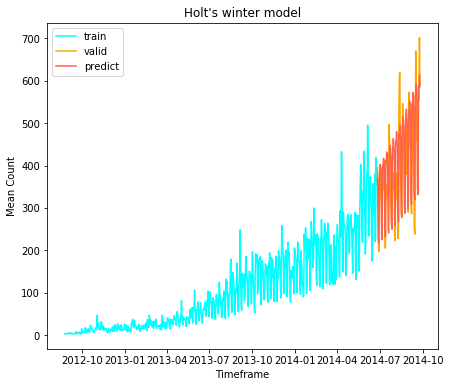

In [52]:
plt.figure(figsize=(7,6))
plt.plot(train['Count'],label='train',color='cyan')
plt.plot(valid['Count'],label='valid',color='orange')
plt.plot(y_hat['predict'],label='predict',color='tomato')
plt.title('Holt\'s winter model')
plt.xlabel('Timeframe')
plt.ylabel('Mean Count')
plt.legend()

### ARIMA model

In [53]:
# The desired parameter of ARIMA model are p,q,r


To check the stationarity we can employ dickey-fuller test

In [54]:
from statsmodels.tsa.stattools import adfuller
def test_station(timeseries):
    # Determining rolling statistics
    roll_mean=timeseries.rolling(window=7).mean()
    roll_std=timeseries.rolling(window=7).std()
    #Plotting the rolling statistics
    plt.figure(figsize=(7,7))
    plt.plot(timeseries,color='cyan',label='original')
    plt.plot(roll_mean,color='red',label='rolling mean')
    plt.plot(roll_std,color='darkblue',label='rolling std')
    plt.title('Visualizing stationarity')
    plt.xlabel('timeframe')
    plt.ylabel('Count')
    plt.legend()
    # Determining dickey fuller statistics
    print('Result of dickey-fuller test:')
    df_test=adfuller(timeseries)
    df_stats=pd.Series(df_test[0:5],index=['Test statistics','p-value','lag used','no. of observations','critical level'])
    print(df_stats)

Result of dickey-fuller test:
Test statistics                                                  1.37051
p-value                                                         0.996976
lag used                                                              20
no. of observations                                                  649
critical level         {'1%': -3.440466106307706, '5%': -2.8660036655...
dtype: object


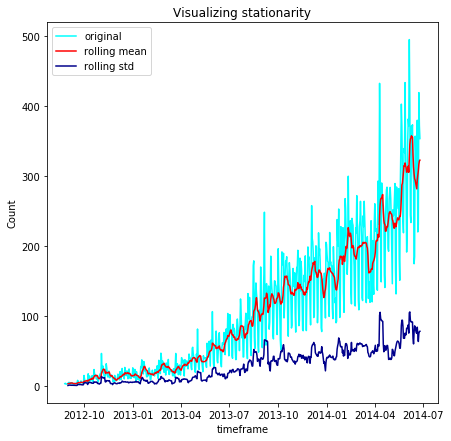

In [55]:
test_station(train['Count'])

As the test_statistics is more than critical value. Therefore, null hypothesis is rejected and data is not stationary

In [56]:
from statsmodels.tsa.arima_model import ARIMA

In [57]:
#Let's calculate the values of p,d,q

In [58]:
train_log=np.log(train['Count'])
valid_log=np.log(train['Count'])

Result of dickey-fuller test:
Test statistics                                                 -8.25336
p-value                                                      5.31721e-13
lag used                                                              19
no. of observations                                                  649
critical level         {'1%': -3.440466106307706, '5%': -2.8660036655...
dtype: object


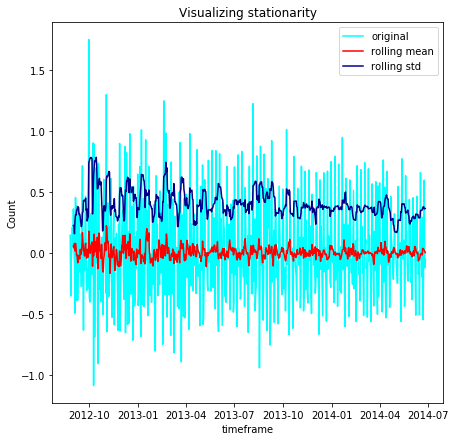

In [59]:
train_log_diff=train_log-train_log.shift(1)
train_log_diff.dropna(inplace=True)
test_station(train_log_diff)

The test_statistic value for shift=1 is -8.23
 for shift=2 is -8.03
 From this value of d can be computed as 1

C:\Users\HP PC\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


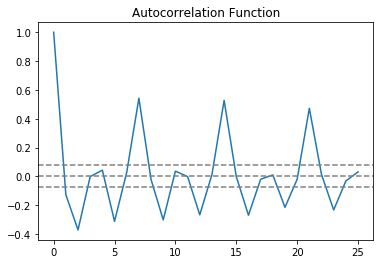

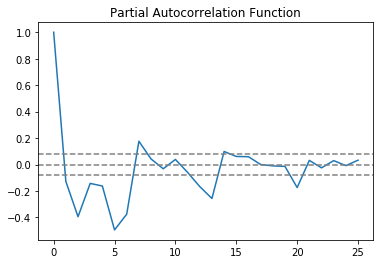

In [60]:
#For calculation p and q value
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(train_log_diff,nlags=25)
lag_pacf=pacf(train_log_diff,nlags=25,method='ols')
plt.plot(lag_acf) 
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Autocorrelation Function') 
plt.show() 
plt.plot(lag_pacf) 
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function') 
plt.show()

In [61]:
# The value of p and q from above graph is between 1 and 2.So we'll take it 2

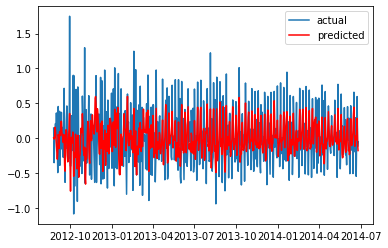

In [62]:
model=ARIMA(train_log,order=(2,1,2))
fit2=model.fit(disp=-1)
plt.plot(train_log_diff,label='actual')
plt.plot(fit2.fittedvalues,color='red',label='predicted')
plt.legend(loc='best')

In [63]:
# This is the function for converting the values to actual scale
def check_prediction_diff(predict_diff,given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Count'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.show()
    print(sqrt(mean_squared_error(predict,given_set['Count'])))

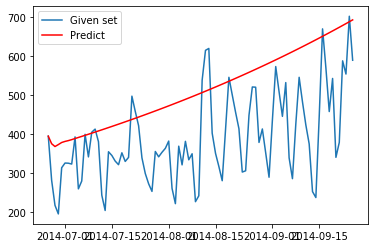

160.07522540318092


In [64]:
arima_predict_diff=fit2.predict(start="2014-06-26", end="2014-09-25")
check_prediction_diff(arima_predict_diff,valid)

**The best accuracy we are able to obtain from ARIMA model is 160.075**

### SARIMAX model

**SARIMAX model takes into account the seasonality of data. So we'll build SARIMAX model**

In [65]:
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX
p=d=q=range(0,5)
pdq=list(product(p,d,q))
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 2, 4),
 (2, 3, 0),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (2, 3, 4),
 (2, 4, 0),
 (2, 4, 1),
 (2, 4, 2),
 (2, 4, 3),
 (2, 4, 4),
 (3, 0, 0),
 (3, 0, 1),
 (3, 0, 2),
 (3, 0, 3),
 (3, 0, 4),
 (3, 1, 0),
 (3, 1, 1),
 (3, 1, 2),
 (3,

In [66]:
rmse_min=150
param_min=tuple()
for param in pdq:
    fit3=SARIMAX(train.Count,order=param,seasonal_order=(0,1,1,7)).fit()
    lis=fit3.predict(start='2014-06-26',end='2014-09-25',dynamic=True)
    rmse=sqrt(mean_squared_error(lis,valid['Count']))
    if rmse_min>=rmse:
        rmse_min=rmse
        param_min=param

C:\Users\HP PC\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\HP PC\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
C:\Users\HP PC\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\HP PC\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\HP PC\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserW

In [67]:
print(rmse_min)
print(param_min)

65.368765076798
(3, 3, 4)


**The minimum value of rmse error we have obtained from SARIMAX is 65.36.
This is also the least rmse value obtained upto now.**

C:\Users\HP PC\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\HP PC\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Text(0, 0.5, 'Count')

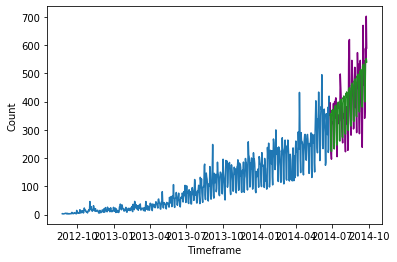

In [68]:
fit=SARIMAX(train.Count,order=(3,3,4),seasonal_order=(0,1,1,7)).fit()
plt.plot(train.Count,label='train')
plt.plot(valid.Count,label='valid',color='purple')
plt.plot(fit.predict(start='2014-06-26',end='2014-09-25',dynamic=True),label='predict',color='forestgreen')
plt.xlabel('Timeframe')
plt.ylabel('Count')

In [69]:
predict=fit.predict(start='2014-09-26',end='2015-04-26',dynamic=True)

C:\Users\HP PC\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:1960: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  ' effect.', ValueWarning)


In [70]:
test_copy['prediction']=predict

In [71]:
test_copy.drop(columns=['Year','Month','Day','Hour','Day of week'],inplace=True)

In [72]:
test_copy.to_csv('F:/jetrail.csv')